# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [164]:
# if plotnine is not installed in Jupter then use the following command to install it

Running this project require the following imports 

In [165]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

%matplotlib inline

In [166]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    plt.figure(figsize=(8,4))
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
    plt.show()

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



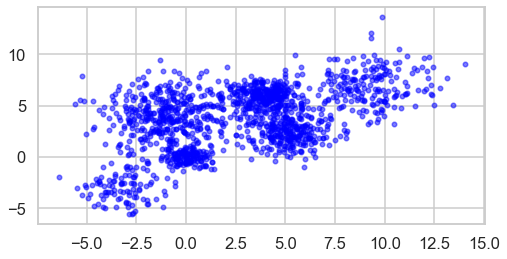

In [167]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

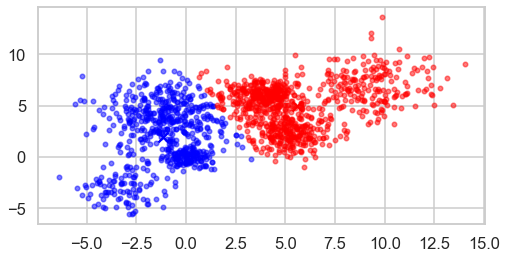

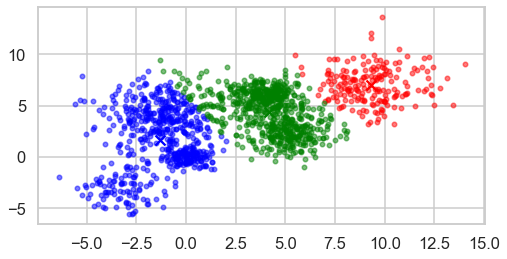

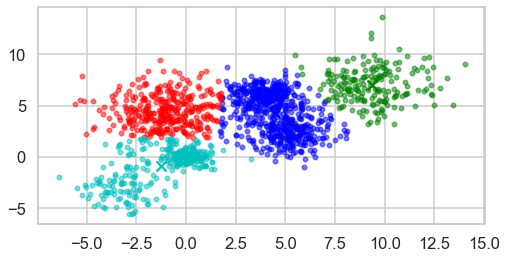

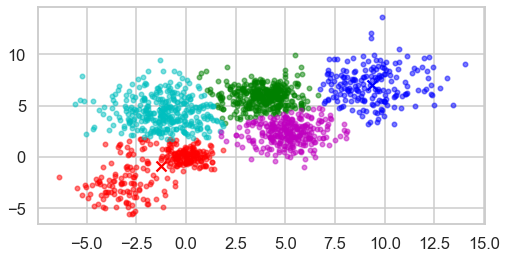

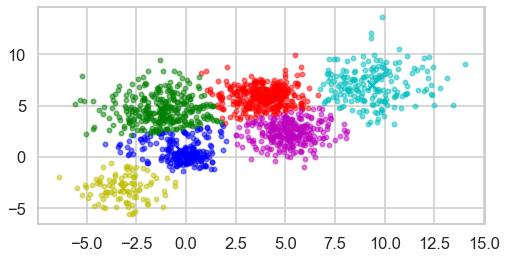

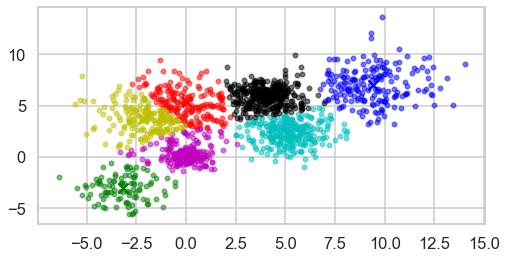

In [168]:
# 7 Clusters just because of colors here to show easily.
for k in range(2,8,1):
    kmeans = KMeans(n_clusters=k).fit(Multi_blob_Data)
    display_cluster(Multi_blob_Data, km= kmeans , num_clusters=k)

In [169]:
# With 20 clusters
distortions = []
inertias = []
silhouettes = []
for k in range(2,21,1):
    kmeans = KMeans(n_clusters=k).fit(Multi_blob_Data)
    
    distortions.append(sum(np.min(cdist(Multi_blob_Data, kmeans.cluster_centers_,'euclidean'), axis=1)) / Multi_blob_Data.shape[0])
    inertias.append(kmeans.inertia_)
    
    silhouettes.append(silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean'))

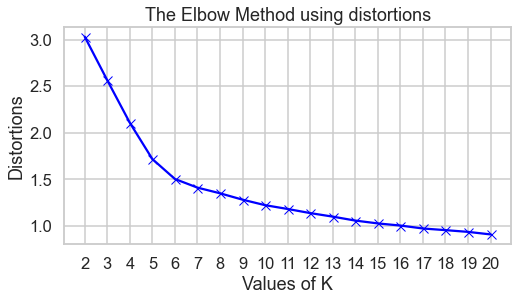

In [170]:
plt.figure(figsize=(8,4))
plt.plot(range(2,21,1), distortions, 'bx-')
plt.xticks(range(2,21,1))
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using distortions')
plt.show()

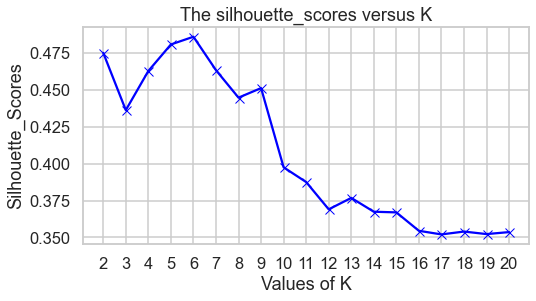

In [171]:
# Best value of K is 6
plt.figure(figsize=(8,4))
plt.plot(range(2,21,1), silhouettes, 'bx-')
plt.xticks(range(2,21,1))
plt.xlabel('Values of K')
plt.ylabel('Silhouette_Scores')
plt.title('The silhouette_scores versus K')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

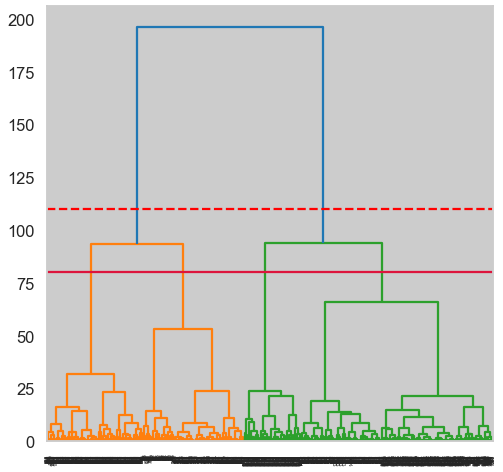

0.2074012584493559


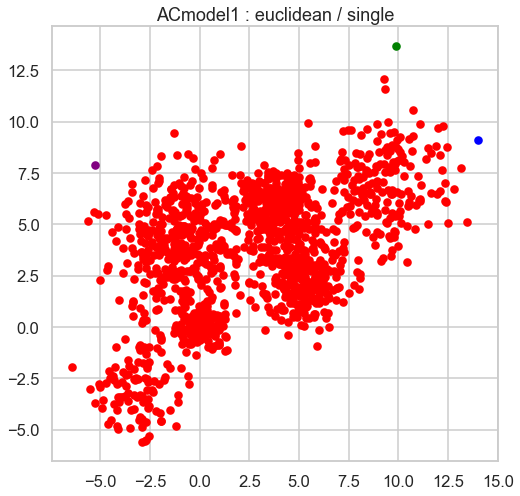

In [172]:
ACmodel1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
X = Multi_blob_Data
ACmodel1.fit(X)
labels = ACmodel1.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette1 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette1)

plt.title('ACmodel1 : euclidean / single')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

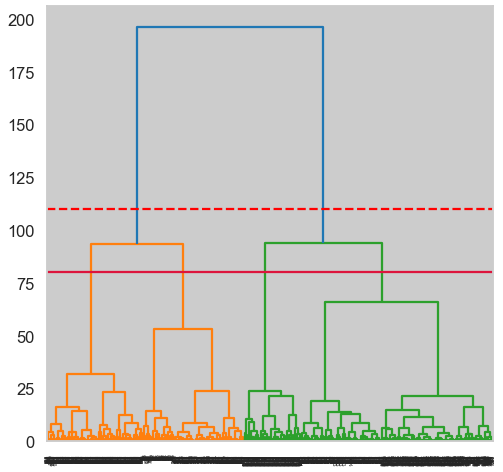

0.4490582469502603


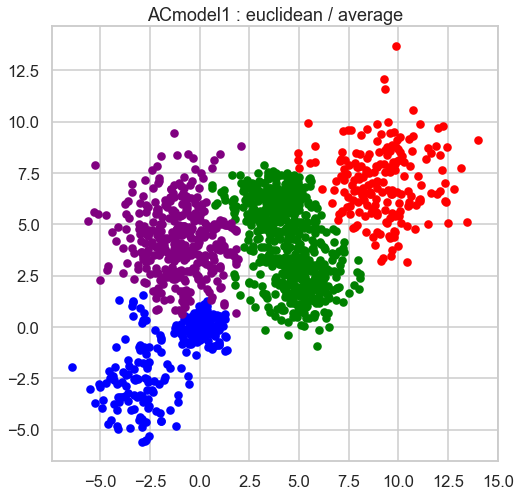

In [173]:
ACmodel2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
X = Multi_blob_Data
ACmodel2.fit(X)
labels = ACmodel2.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette2 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette2)

plt.title('ACmodel1 : euclidean / average')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

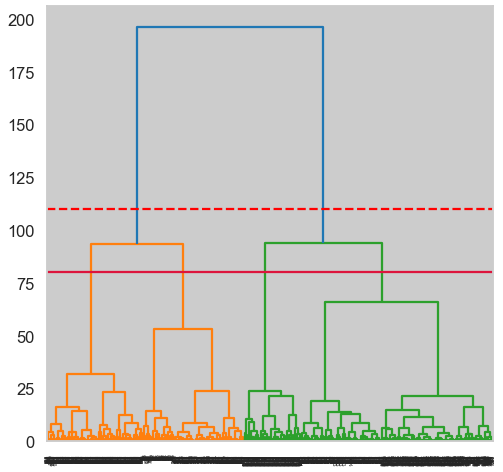

0.14871638406533946


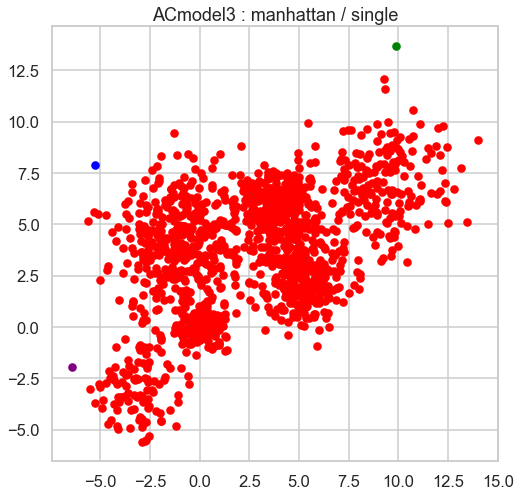

In [174]:
ACmodel3 = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='single')
X = Multi_blob_Data
ACmodel3.fit(X)
labels = ACmodel3.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette3 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette3)

plt.title('ACmodel3 : manhattan / single')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

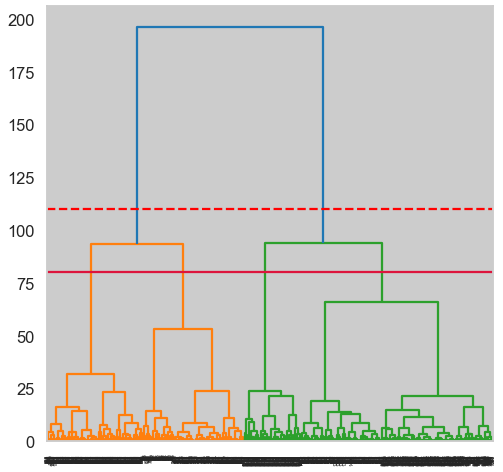

0.38321869346484616


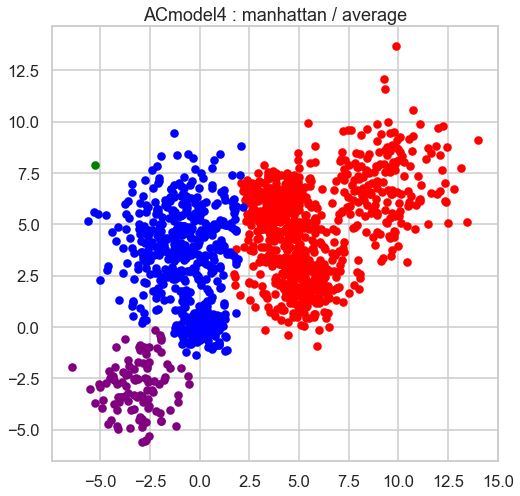

In [175]:
ACmodel4 = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='average')
X = Multi_blob_Data
ACmodel4.fit(X)
labels = ACmodel4.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette4 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette4)

plt.title('ACmodel4 : manhattan / average')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

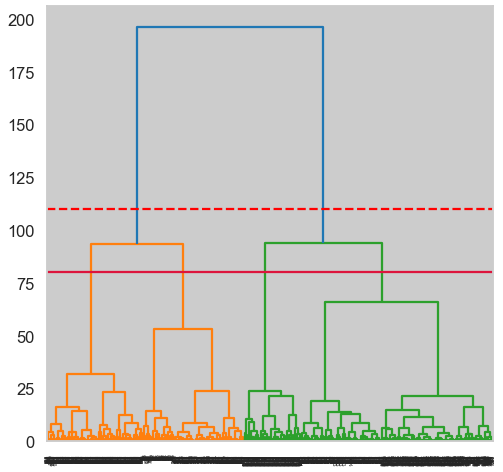

-0.03872065159633617


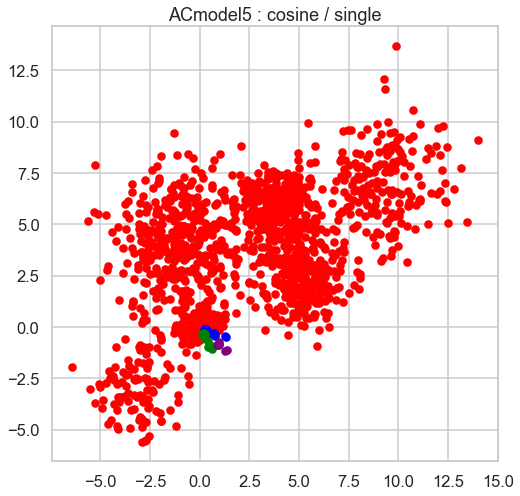

In [176]:
ACmodel5 = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='single')
X = Multi_blob_Data
ACmodel5.fit(X)
labels = ACmodel5.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette5 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette5)

plt.title('ACmodel5 : cosine / single')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

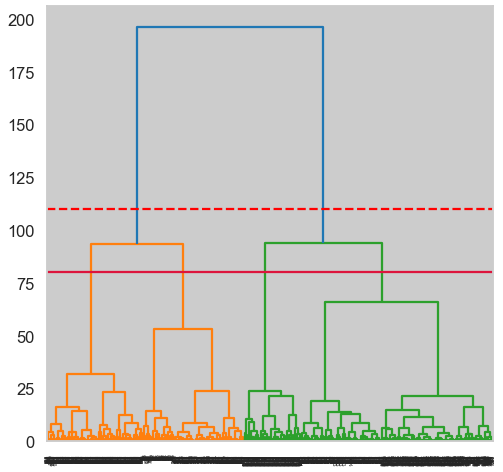

0.28022113778340446


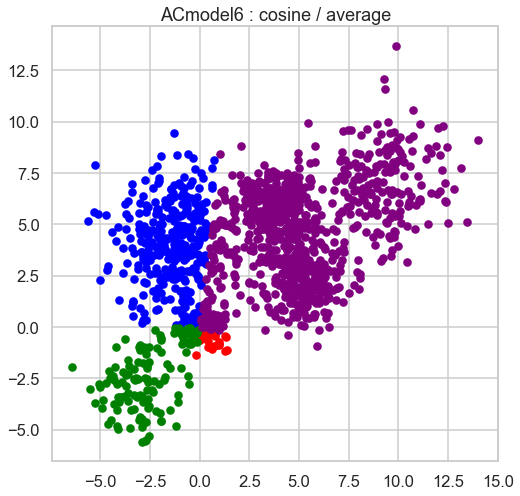

In [177]:
ACmodel6 = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')
X = Multi_blob_Data
ACmodel6.fit(X)
labels = ACmodel6.labels_

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method="ward"))
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(110, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 
plt.show()

silhouette6 = silhouette_score(Multi_blob_Data, labels, metric='euclidean')
print(silhouette6)

plt.title('ACmodel6 : cosine / average')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

In [178]:
#The best is euclidean and average.

In [179]:
#sns.scatterplot(data=X, hue=ACmodel1.labels_).set_title('Without choosing number of clusters');

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

[-1 -1 -1 ... -1 -1 -1]
['y', 'b', 'g', 'r']


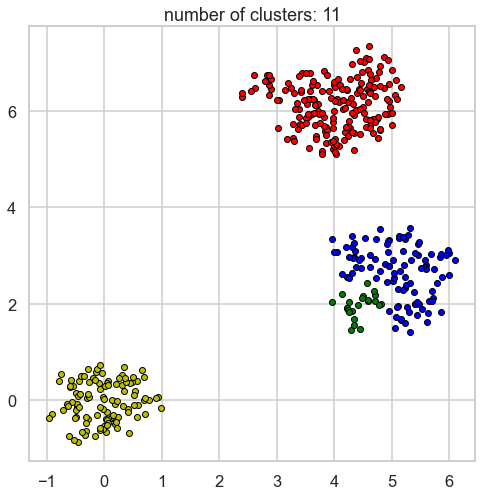

Silhouette Coefficient:-0.31


In [189]:
# Load data in X
X = Multi_blob_Data
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  
# Plot result
  
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  
#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [181]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 